In [ ]:
#  pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 19.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ls

In [ ]:
# cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# Importing Libraries
import cv2
import mediapipe as mp
import pandas as pd
import os
import warnings
import imutils
from IPython.display import display, Javascript
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
warnings.filterwarnings("ignore")

In [ ]:
# Feature Extraction
tab_features = []
tab_label = []
directory = '/content/drive/MyDrive/Colab Notebooks/Dataset/Dataset1_Train'
for folder in os.listdir(directory):
    f = os.path.join(directory, folder)
    for file in os.listdir(f):
        sample_img = cv2.imread(os.path.join(f, file))
        with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
            results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
            image = cv2.imread(os.path.join(f, file))
            image_height, image_width, _ = image.shape
            if results.multi_hand_landmarks:
                x, y, z, label = [], [], [], []
                for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                    for i in range(21):
                        x.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                            i).value].x * image_width - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].x * image_width)
                        y.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                            i).value].y * image_height - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].y * image_height)
                        z.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                            i).value].z * image_width - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].z * image_width)
                    col = x + y + z
                tab_features.append(col)
                tab_label.append(folder)

In [ ]:
# Dataset Making
df_features = pd.DataFrame(tab_features).iloc[:, :63]
df_label = pd.DataFrame(tab_label)

In [ ]:
# Printing the Dataset
print(df_features)

      0           1           2           3           4           5   \
0    0.0   62.806892  122.629223  165.748901  203.566418   96.631222   
1    0.0   64.473209  123.216763  166.368885  203.964615   93.950129   
2    0.0   62.263069  122.391157  163.217154  201.900873   95.457602   
3    0.0   65.823269  129.004641  168.206921  204.759865  100.655622   
4    0.0   63.769541  124.115238  165.541706  204.235153   98.787632   
..   ...         ...         ...         ...         ...         ...   
229  0.0    1.541748   34.630966   77.640667  100.270500   96.114807   
230  0.0   85.204496  122.853842  136.289835  155.462866   69.512329   
231  0.0   83.712044  117.579918  125.638790  143.889771   66.000023   
232  0.0  107.956753  156.032438  150.369616  129.381065   59.962835   
233  0.0    5.607777   39.026642   83.975143  113.441792   99.627972   

             6           7           8           9   ...         53  \
0    104.848852  110.101604  112.299385   55.364799  ... -63.500

In [ ]:
# Printing the Labels
print(df_label)

         0
0     love
1     love
2     love
3     love
4     love
..     ...
229  sorry
230  sorry
231  sorry
232  sorry
233  sorry

[234 rows x 1 columns]


In [ ]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
df_label = label_encoder.fit_transform(df_label)

In [ ]:
# Printing the Labels after Label Encoding
print(df_label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
# Train Test Split
target = df_label
features = df_features
X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.2, random_state=10)

In [ ]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
print(classification_report(svc_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_pred = nb.predict(X_test)
print(classification_report(nb_pred, Y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.57      0.73         7
           2       1.00      0.80      0.89        15
           3       0.67      1.00      0.80         4
           4       0.67      0.89      0.76         9

    accuracy                           0.85        47
   macro avg       0.85      0.85      0.83        47
weighted avg       0.89      0.85      0.85        47



In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
sgd_pred = sgd.predict(X_test)
print(classification_report(sgd_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [ ]:
# K Nearest Neighbour
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
print(classification_report(knn_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
print(classification_report(dt_pred, Y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.80      0.89         5
           2       1.00      0.86      0.92        14
           3       0.83      1.00      0.91         5
           4       0.92      1.00      0.96        11

    accuracy                           0.94        47
   macro avg       0.93      0.93      0.93        47
weighted avg       0.94      0.94      0.94        47



In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
print(classification_report(rf_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
print(classification_report(lr_pred, Y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12

    accuracy                           0.98        47
   macro avg       0.98      0.96      0.97        47
weighted avg       0.98      0.98      0.98        47



Live Picture Capturing

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Function Call
original_image = take_photo()

<IPython.core.display.Javascript object>

In [ ]:
img = cv2.imread(original_image)

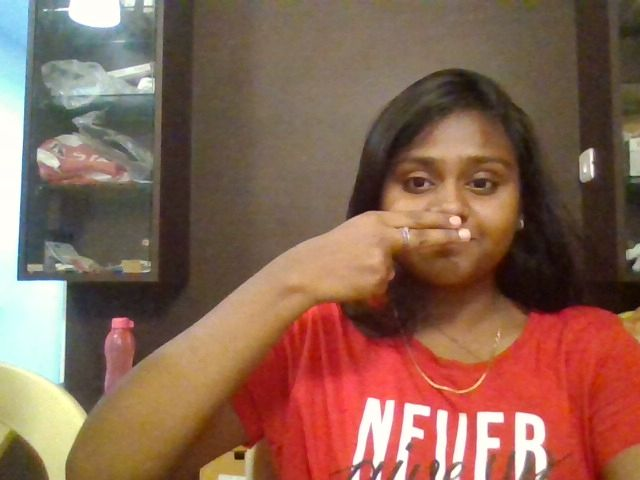

In [ ]:
cv2_imshow(img)

In [ ]:
test_tab_features = []
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
  test_results = hands.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  if test_results.multi_hand_landmarks:
            x, y, z = [], [], []
            for multi_hand_landmarks in results.multi_hand_landmarks:
                for i in range(21):
                    x.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                            i).value].x * image_width - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].x * image_width)
                    y.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                            i).value].y * image_height - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].y * image_height)
                    z.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                            i).value].z * image_width - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].z * image_width)
                col = x + y + z
                test_tab_features.append(col)

In [ ]:
rf_pred = rf.predict(test_tab_features)

In [ ]:
tested_word = label_encoder.inverse_transform(rf_pred)

In [ ]:
print(tested_word[0])

sorry


Video Capture

In [ ]:
vid='/content/video1.mp4'

In [ ]:
c=0
cap = cv2.VideoCapture('/content/video1.mp4')
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break
  test_tab_features = []
  with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    test_results = hands.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if test_results.multi_hand_landmarks:
              x, y, z = [], [], []
              for multi_hand_landmarks in results.multi_hand_landmarks:
                  for i in range(21):
                      x.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                              i).value].x * image_width - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].x * image_width)
                      y.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                              i).value].y * image_height - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].y * image_height)
                      z.append(hand_landmarks.landmark[mp_hands.HandLandmark(
                              i).value].z * image_width - hand_landmarks.landmark[mp_hands.HandLandmark(0).value].z * image_width)
                  col = x + y + z
                  test_tab_features.append(col)
    rf_pred = rf.predict(test_tab_features)
    tested_word = label_encoder.inverse_transform(rf_pred)
    print(tested_word[0],c)
    c=c+1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()